In [1]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
img = cv2.imread("./test_images/sharapova2.jpg")
img.shape

(675, 1200, 3)

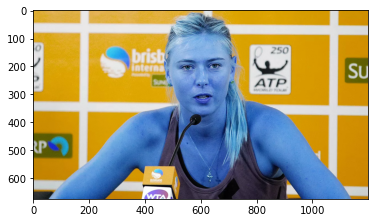

In [4]:
plt.imshow(img);

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(675, 1200)

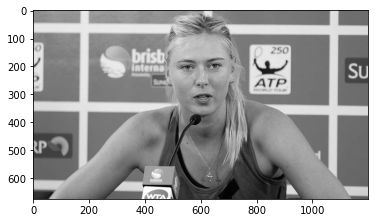

In [6]:
plt.imshow(gray, cmap="gray");

In [7]:
face_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[476,  98, 258, 258]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(476, 98, 258, 258)

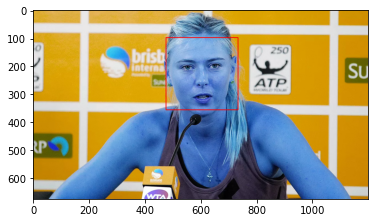

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img);

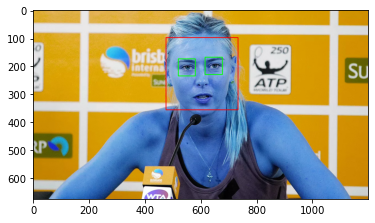

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [11]:
ex, ey, ew, eh = eyes[0]

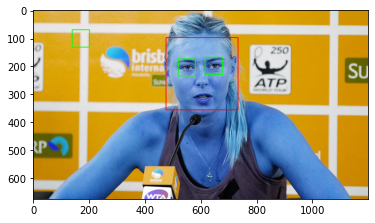

In [12]:
cv2.destroyAllWindows()
deneme = cv2.rectangle(cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2),(ex, ey), (ex+ ew, ey+ eh), (0,255,0),2)
plt.imshow(deneme); # Alternatif

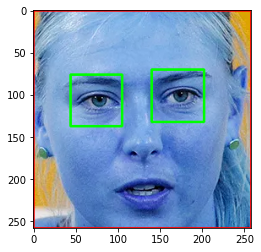

In [13]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray');

In [56]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color

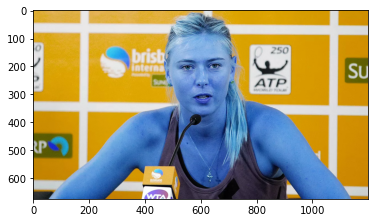

In [57]:
org_image = cv2.imread("./test_images/sharapova2.jpg")
plt.imshow(org_image);

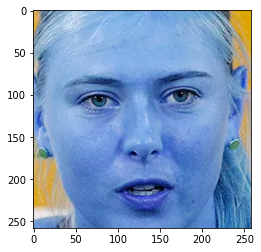

In [58]:
cropped_img = get_cropped_image_if_2_eyes("./test_images/sharapova2.jpg")
if cropped_img is not None:
    plt.imshow(cropped_img)

In [71]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

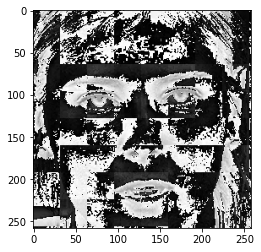

In [72]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

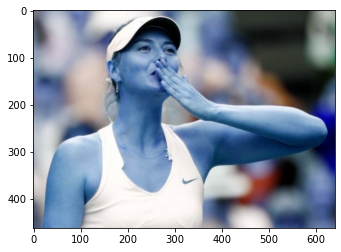

In [59]:
org_img2 = cv2.imread("./test_images/sharapova1.jpg")
plt.imshow(org_img2);

In [60]:
cropped_img2 = get_cropped_image_if_2_eyes("./test_images/sharapova1.jpg")
if cropped_img2 is not None:
    plt.imshow(cropped_img2)

In [61]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [62]:
import os

In [63]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [64]:
img_dirs

['./dataset/cropped',
 './dataset/fred',
 './dataset/kocaman',
 './dataset/messi',
 './dataset/sainz',
 './dataset/sharapova']

In [65]:
import shutil

In [66]:
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [67]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/fred
Generating cropped images in folder:  ./dataset/cropped/kocaman
Generating cropped images in folder:  ./dataset/cropped/messi
Generating cropped images in folder:  ./dataset/cropped/sainz
Generating cropped images in folder:  ./dataset/cropped/sharapova


In [68]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'fred': ['./dataset/cropped/fred\\fred1.png',
  './dataset/cropped/fred\\fred10.png',
  './dataset/cropped/fred\\fred11.png',
  './dataset/cropped/fred\\fred12.png',
  './dataset/cropped/fred\\fred13.png',
  './dataset/cropped/fred\\fred14.png',
  './dataset/cropped/fred\\fred15.png',
  './dataset/cropped/fred\\fred16.png',
  './dataset/cropped/fred\\fred17.png',
  './dataset/cropped/fred\\fred18.png',
  './dataset/cropped/fred\\fred19.png',
  './dataset/cropped/fred\\fred2.png',
  './dataset/cropped/fred\\fred20.png',
  './dataset/cropped/fred\\fred21.png',
  './dataset/cropped/fred\\fred22.png',
  './dataset/cropped/fred\\fred3.png',
  './dataset/cropped/fred\\fred4.png',
  './dataset/cropped/fred\\fred5.png',
  './dataset/cropped/fred\\fred6.png',
  './dataset/cropped/fred\\fred7.png',
  './dataset/cropped/fred\\fred8.png',
  './dataset/cropped/fred\\fred9.png'],
 'kocaman': ['./dataset/cropped/kocaman\\kocaman1.png',
  './dataset/cropped/kocaman\\kocaman10.png',
  './dataset/cropp

In [69]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'fred': 0, 'kocaman': 1, 'messi': 2, 'sainz': 3, 'sharapova': 4}

In [73]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [74]:
len(X[0])

4096

In [75]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(183, 4096)

In [76]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7391304347826086

In [78]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.91      0.67      0.77        15
           2       0.88      0.70      0.78        10
           3       0.47      1.00      0.64         9
           4       1.00      0.71      0.83         7

    accuracy                           0.74        46
   macro avg       0.85      0.74      0.75        46
weighted avg       0.84      0.74      0.75        46



In [79]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [87]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [0.2,0.5,1,5,10,15,20]
        }
    }
}

In [88]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=10, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.781319,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.539560,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.708242,{'logisticregression__C': 0.2}


In [89]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=0.2, solver='liblinear'))])}

In [90]:
best_estimators['svm'].score(X_test,y_test)

0.782608695652174

In [91]:
best_estimators['random_forest'].score(X_test,y_test)

0.4782608695652174

In [92]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8043478260869565

In [86]:
?LogisticRegression

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

In [93]:
?SVC

Init signature:
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the corresponding section in the narrati

In [94]:
best_clf = best_estimators['logistic_regression']

In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 4,  0,  0,  1,  0],
       [ 1, 11,  0,  1,  2],
       [ 0,  0, 10,  0,  0],
       [ 1,  0,  2,  5,  1],
       [ 0,  0,  0,  0,  7]], dtype=int64)

Text(69.0, 0.5, 'Truth')

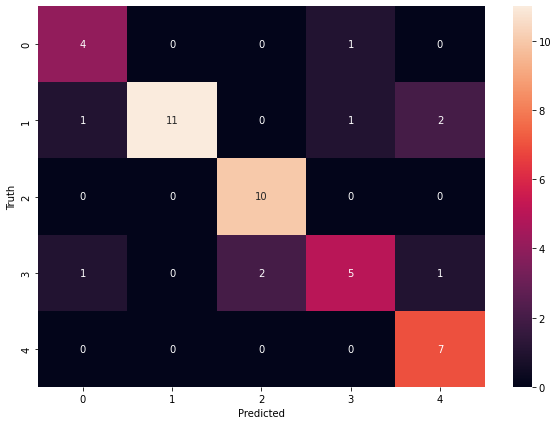

In [96]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [97]:
class_dict

{'fred': 0, 'kocaman': 1, 'messi': 2, 'sainz': 3, 'sharapova': 4}

In [98]:
!pip install joblib

In [99]:
import joblib 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [100]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))